In [40]:
import os
import numpy as np
import plotly.graph_objs as go
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvas
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import panel as pn
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact
import seaborn as sns
plt.rcParams['figure.figsize'] = (18,9)
# Initialize the Panel Extensions (for Plotly)
pn.extension('plotly')
pn.extension()
import plotly.graph_objects as go  
from plotly.subplots import make_subplots
from urllib.request import urlopen
import json

In [41]:
zip_list=[10453, 10457, 10460, 10458, 10467, 10468, 10451, 10452, 10456, 10454, 10455, 10459, 10474,10463, 10471, 10466, 10469, 10470, 10475,10461, 10462,10464, 10465, 10472, 10473,11212, 11213, 11216, 11233, 11238,11209, 11214, 11228,11204, 11218, 11219, 11230,11234, 11236, 11239, 11223, 11224, 11229, 11235,11201, 11205, 11215, 11217, 11231,11203, 11210, 11225, 11226,11207, 11208,11211, 11222,11220, 11232,11206, 11221, 11237,10026, 10027, 10030, 10037, 10039, 10001, 10011, 10018, 10019, 10020, 10036,10029, 10035, 10010, 10016, 10017, 10022,10012, 10013, 10014,10004, 10005, 10006, 10007, 10038, 10280,10002, 10003, 10009,10021, 10028, 10044, 10065, 10075, 10128, 10023, 10024, 10025,10031, 10032, 10033, 10034, 10040 ,11361, 11362, 11363, 11364,11354, 11355, 11356, 11357, 11358, 11359, 11360, 11365, 11366, 11367,11412, 11423, 11432, 11433, 11434, 11435, 11436,11101, 11102, 11103, 11104, 11105, 11106, 11374, 11375, 11379, 11385, 11691, 11692, 11693, 11694, 11695, 11697,11004, 11005, 11411, 11413, 11422, 11426, 11427, 11428, 11429,11414, 11415, 11416, 11417, 11418, 11419, 11420, 11421,11368, 11369, 11370, 11372, 11373, 11377, 11378, 10302, 10303, 10310,10306, 10307, 10308, 10309, 10312,10301, 10304, 10305, 10314]

In [42]:
bronx=[10453, 10457, 10460, 10458, 10467, 10468, 10451, 10452, 10456, 10454, 10455, 10459, 10474,10463, 10471, 10466, 10469, 10470, 10475,10461, 10462,10464, 10465, 10472, 10473]

brooklyn=[11212, 11213, 11216, 11233, 11238,11209, 11214, 11228,11204, 11218, 11219, 11230,11234, 11236, 11239, 11223, 11224, 11229, 11235,11201, 11205, 11215, 11217, 11231,11203, 11210, 11225, 11226,11207, 11208,11211, 11222,11220, 11232,11206, 11221, 11237]

manhattan=[ 10026, 10027, 10030, 10037, 10039, 10001, 10011, 10018, 10019, 10020, 10036,10029, 10035, 10010, 10016, 10017, 10022,10012, 10013, 10014,10004, 10005, 10006, 10007, 10038, 10280,10002, 10003, 10009,10021, 10028, 10044, 10065, 10075, 10128, 10023, 10024, 10025,10031, 10032, 10033, 10034, 10040]

queens=[11361, 11362, 11363, 11364,11354, 11355, 11356, 11357, 11358, 11359, 11360, 11365, 11366, 11367,11412, 11423, 11432, 11433, 11434, 11435, 11436,11101, 11102, 11103, 11104, 11105, 11106, 11374, 11375, 11379, 11385, 11691, 11692, 11693, 11694, 11695, 11697,11004, 11005, 11411, 11413, 11422, 11426, 11427, 11428, 11429,11414, 11415, 11416, 11417, 11418, 11419, 11420, 11421,11368, 11369, 11370, 11372, 11373, 11377, 11378]

staten_island=[ 10302, 10303, 10310,10306, 10307, 10308, 10309, 10312,10301, 10304, 10305, 10314]

In [43]:
# key initiation
api_key = os.getenv("ATTOM_API_KEY")
type(api_key)
def get_data_from_attom(url,querystring):    
    headers = { 
        'accept': "application/json", 
        'apikey': api_key, 
    } 

    response = requests.request("GET", url, headers=headers, params=querystring)
    print (response.url)
    json_formatted=json.loads(response.text)

    return json_formatted

In [44]:
# Reading junction files from the database later DB

neighborhood_match_csv = Path("data/zipcodeMapping.csv")
neighborhood_junction_file = pd.read_csv(neighborhood_match_csv)


In [45]:
# break down all the zipcode and create a new datafram
# Data clean up to find all the zip codes.
# intialize an array with all the zip codes.
all_zipcodes =[]
def clean_up_and_collect_zip(neighborhood_junction_file,all_zipcodes):
    for index, row in neighborhood_junction_file.iterrows():
        result = isinstance(row["ZIP Codes"], list)
        if (not result):
            zip_code_boroughs = [x.strip() for x in (row["ZIP Codes"]).split(',')]
            all_zipcodes.append(["ZI" + x for x in zip_code_boroughs])
            row["ZIP Codes"] = zip_code_boroughs
        else:
            all_zipcodes = all_zipcodes + ["ZI" + x for x in row["ZIP Codes"]]
    #         dict_neighborhood[row["Neighborhood"]] = [row["Borough"],zipcodelist
    return all_zipcodes
all_zipcodes = clean_up_and_collect_zip(neighborhood_junction_file,all_zipcodes)


In [46]:
# Read Rent Data from Zillow csv file
rent_data_csv = Path("data/Zip_Rent_2015.csv")
rent_data_csv = pd.read_csv(rent_data_csv)


In [47]:
cleaned_rent_data = rent_data_csv[rent_data_csv['City']=="New York"].drop(['2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12',
                   '2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-07','2016-08','2016-09','2016-10','2016-11','2016-12',
                   '2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12',
                   '2018-01','2018-02','2018-03','2018-04','2018-05','2018-06','2018-07','2018-08','2018-09','2018-10','2018-11','2018-12','2020-01',
                    'SizeRank','RegionID','Metro','State','City','CountyName']
                   ,axis=1)


cleaned_rent_data.dropna(inplace=True)


In [48]:
# get the 2019 snapshot of average rent
col = cleaned_rent_data.loc[: , "2019-01":"2019-12"]
cleaned_rent_data.insert(2, "Average Rent 2019", col.mean(axis=1), True) 
cleaned_rent_data.drop(['2019-01','2019-02','2019-03','2019-04','2019-05','2019-06','2019-07','2019-08','2019-09','2019-10','2019-11','2019-12'],axis=1,inplace=True)


In [49]:

cleaned_rent_data.rename(columns={'RegionName':'Zip Code'}, inplace=True)
cleaned_rent_data.set_index("Zip Code", inplace=True)


In [50]:
# GET all the sales data

colnames = ["sno","Zip Code", "Date", "Num of Units Sold", "Average Sales", "Median Sales"]

# check to see if the file exists if so don't make API calls (because its a trial key we have limited usage)
def need_to_fetch_data():
    df=pd.DataFrame()
    path = Path('data/NYC_data.csv')
    if (path.exists()):
        print("File already exists no need to make expensive API calls")
        df = pd.read_csv(path, names=colnames, header=None)
    else: 
        print("BEGINNING THE API CALLS TO IMPORT DATA")
        
    return df


In [51]:
import time
sales_df = need_to_fetch_data()

# API REQUEST RESTRICTION: cannot make more than 7-9 requests a minute! Also they don't have bulk zipcode calls
# So put a sleep timer to collect the data

if(sales_df.empty):    
    url = "https://api.gateway.attomdata.com/propertyapi/v1.0.0/salestrend/snapshot"
    all_data_df = pd.DataFrame()
    for zipcode_list in all_zipcodes[41:42]:
        for zipcode in zipcode_list:
            print(zipcode)
            sale = []
            querystring = {"geoid":zipcode,"interval":"monthly","startyear":"2010","endyear":"2019","startmonth":"january","endmonth":"december"}
            print (querystring)
            json_formatted = get_data_from_attom(url,querystring)
            for row in json_formatted['salestrends']:
                location = row['location']['geoID']
                date = row['daterange']['start']
                homesalecount = row['SalesTrend']['homesalecount']
                avgsaleprice = row['SalesTrend']['avgsaleprice']
                medsaleprice = row['SalesTrend']['medsaleprice']     
                sale.append([location,date, homesalecount, avgsaleprice,medsaleprice])
            df = pd.DataFrame(columns=['location', 'date','homesalecount','avgsaleprice','medsaleprice'], data=sale)
            df['date']= pd.to_datetime(df['date']) 
            all_data_df.append(df)
            # df.set_index('date', inplace=True)
            filename = 'data/NYC_data.csv'
            # put it all in the csv file 
            df.to_csv(filename, mode='a', header=False)      
        time.sleep(40)


sales_df['Date']= pd.to_datetime(sales_df['Date'])


File already exists no need to make expensive API calls


In [52]:
# Clean up date

#zip code format
sales_df['Zip Code'] = (sales_df['Zip Code']).str[2:]
sales_df.dropna(inplace=True)
sales_df.drop(columns=['sno'], inplace=True)


In [53]:

list_of_boroughs = []
list_of_neighborhoods = []

# take the row get the zipcode
for x, row in sales_df.iterrows():
    zipcode = row[0].strip()
    region = [row for x, row in neighborhood_junction_file.iterrows() if zipcode in row['ZIP Codes']]
    if len(region) > 0:
         list_of_boroughs.append(region[0]['Borough'])
         list_of_neighborhoods.append(region[0]['Neighborhood'])

borough = pd.Series(list_of_boroughs)  
sales_df.insert(loc=0, column='Borough', value=borough)


neighborhood = pd.Series(list_of_neighborhoods)  
sales_df.insert(loc=1, column='Neighborhood', value=neighborhood)
sales_df.set_index('Date',inplace =True)

In [54]:


with open('data/nyc_zip_code_tabulation_areas_polygons.geojson') as f:
    counties = json.load(f)
df = sales_df

In [55]:
df.sort_index(inplace=True)
df = sales_df[df.index.year == 2019].groupby(['Zip Code']).mean()

In [56]:
# merge the rent file

df.head()
df.sort_index(inplace=True)


In [57]:
df.index = df.index.astype('int64')


In [59]:
# merge rent data, average sales and return

cleaned_rent_data.sort_index(inplace=True)
df_new = pd.concat([df,cleaned_rent_data], axis=1, join='outer', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)

df_new.fillna(0, inplace=True)
df_new['ROI'] = df_new['Average Rent 2019']*12/df_new['Average Sales'] * 100

In [60]:
def plot_map_sale_per_neighborhood():
    fig_map = px.choropleth_mapbox(df_new, geojson=counties, locations=df_new.index, color='Average Sales',
                               color_continuous_scale="inferno",featureidkey="properties.postalcode",
                               range_color=(100000, 4000000),
                               mapbox_style="carto-positron", 
                               zoom=10, center = {"lat": 40.7048, "lon": -73.9419},
                               opacity=0.5,
                               width = 800
                               ,hover_name = df_new.index
                               ,hover_data=df_new[["Average Sales", "Average Rent 2019", "ROI"]]
                               ,title="Average Sales in 2019 by Zip Code"
                               ,labels={'Average Sales 2019':'Average Sales 2019'}
                              )
    fig_map.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    return fig_map

In [61]:
sales_grouped_date = sales_df.groupby(sales_df.index.year).mean()

by_borough_2019 = sales_df[sales_df.index.year == 2019].groupby(['Neighborhood']).mean()


In [62]:
def plot_2019_snapshot():
    
    fig1 = px.line(by_borough_2019, x=by_borough_2019.index, y=by_borough_2019["Average Sales"])
    fig1.update_traces(line_color='#DC143C')
    
   
    fig2 = px.bar(by_borough_2019, x=by_borough_2019.index, y=by_borough_2019["Num of Units Sold"],opacity=0.8)

    # Create figure with secondary y-axis
    
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Add traces
    fig.add_trace(
        fig1.data[0],
        secondary_y=False,
    )

    fig.add_trace(
        fig2.data[0],
        secondary_y=True,
    )

    # Add figure title
    fig.update_layout(
    
        height=600
    )

    # Set x-axis title
    fig.update_xaxes(title_text="Neighborhood")

    # Set y-axes titles
    fig.update_yaxes(title_text="<b>Average Sales </b> (express as line)", secondary_y=False)
    fig.update_yaxes(title_text="<b>Number of Units Sold</b> (expressed as bars)", secondary_y=True)

    return fig

In [63]:
# compares two YoY changes for Average Sales 
def plot_year_price_change():
    by_borough_2018 = sales_df[sales_df.index.year == 2018].groupby(['Neighborhood']).mean()
    fig = go.Figure(
        data=
        [
        go.Bar(name='2018', x=by_borough_2019.index, y=by_borough_2018['Average Sales']),
        go.Bar(name='2019', x=by_borough_2019.index, y=by_borough_2019['Average Sales'])    
    ],
        layout=go.Layout(
            yaxis_title="Average Sale"
            ,height=600
        )
    )

    # Change the bar mode
    fig.update_layout(barmode='group')
    return fig 

In [64]:
nyc_sale_path=Path("data/NYC_data.csv")
colnames = ["sno","Zip Code", "Date", "Num of Units Sold", "Average Sales", "Median Sales"]

nyc_sale_df=pd.read_csv(nyc_sale_path, names=colnames, header=None)
nyc_sale_df.drop(columns=['sno','Num of Units Sold','Median Sales'],inplace=True)
for i in range (len(nyc_sale_df)):
    nyc_sale_df.iloc[i,0]=nyc_sale_df.iloc[i,0][2:]
nyc_sale_df['Borough']=pd.Series()
for i in range(len(nyc_sale_df)):
    if int(nyc_sale_df.iloc[i,0]) in bronx:
        nyc_sale_df.iloc[i,3]='Bronx'
    elif int(nyc_sale_df.iloc[i,0]) in brooklyn:
        nyc_sale_df.iloc[i,3]='Brooklyn'
    elif int(nyc_sale_df.iloc[i,0]) in manhattan:
        nyc_sale_df.iloc[i,3]='Manhattan'
    elif int(nyc_sale_df.iloc[i,0]) in queens:
         nyc_sale_df.iloc[i,3]='Queens'
    elif int(nyc_sale_df.iloc[i,0]) in staten_island:
         nyc_sale_df.iloc[i,3]='Staten Island'
nyc_sale_df['Date']=pd.to_datetime(nyc_sale_df['Date'])
nyc_sale_df.sort_values(by='Date',inplace=True) 


In [65]:
rent_path=Path("data/Zip_Rent_2015.csv")
rent_df=pd.read_csv(rent_path)

rent_ny_df=rent_df[rent_df['City'] == "New York"]
#rent_ny_df.fillna(0,inplace=True)
rent_ny_df.reset_index(inplace=True)        
rent_ny_df.drop(columns=['RegionID','index','SizeRank','Metro','State','City','CountyName'],inplace=True)
rent_ny_df.rename(columns={"RegionName": "Zip_Code"},inplace=True) 
rent_ny_df['Borough']=pd.Series()
column_names_rent=list(rent_ny_df.columns.values)
rent_ny_df=rent_ny_df[['Zip_Code','Borough' , '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12', '2020-01']]

for i in range(len(rent_ny_df)):
    if rent_ny_df.iloc[i,0] in bronx:
        rent_ny_df.iloc[i,1]='Bronx'
    elif rent_ny_df.iloc[i,0] in brooklyn:
        rent_ny_df.iloc[i,1]='Brooklyn'
    elif rent_ny_df.iloc[i,0] in manhattan:
        rent_ny_df.iloc[i,1]='Manhattan'
    elif rent_ny_df.iloc[i,0] in queens:
         rent_ny_df.iloc[i,1]='Queens'
    elif rent_ny_df.iloc[i,0] in staten_island:
         rent_ny_df.iloc[i,1]='Staten Island'
    



C:\Users\harya\anaconda3\envs\pyvizenv\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\harya\anaconda3\envs\pyvizenv\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\harya\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [66]:

def rent_per_borough():
    avg_rent_price_per_borough_1=rent_ny_df.drop(columns='Zip_Code')
    avg_rent_price_per_borough_1.set_index(avg_rent_price_per_borough_1['Borough'],inplace=True)
    avg_rent_price_per_borough_1.drop(columns='Borough',inplace=True)
    avg_rent_price_per_borough_1=avg_rent_price_per_borough_1.groupby('Borough').mean().transpose()
    fig_rent = Figure(figsize=(8, 4))
    FigureCanvas(fig_rent)
#     fig_rent = avg_rent_price_per_borough_1.hvplot(rot=90)
    ax = fig_rent.subplots()
    ax = avg_rent_price_per_borough_1.plot(ax=ax)
    return fig_rent
def plot_avg_sale_price():
    avg_sale_price_per_borough=nyc_sale_df.drop(columns='Zip Code')
    avg_sale_price_per_borough=avg_sale_price_per_borough.pivot_table(index='Date',columns='Borough',values='Average Sales')
    fig_sale = Figure(figsize=(8, 4))
    FigureCanvas(fig_sale)
    ax = fig_sale.subplots()
    ax = avg_sale_price_per_borough.plot(ax=ax)
    return fig_sale
list_of_boroughs=['Manhattan','Bronx','Brooklyn','Queens','Staten Island']

In [67]:
def plot_avg_sale_price_per_borough (borough):
    fig_sale = Figure(figsize=(8, 4))
    FigureCanvas(fig_sale)
    avg_sale_price_per_borough=nyc_sale_df.drop(columns='Zip Code')
    avg_sale_price_per_borough=avg_sale_price_per_borough.pivot_table(index='Date',columns='Borough',values='Average Sales')
    ax = fig_sale.subplots()
    ax = avg_sale_price_per_borough[borough].plot(rot=90,
                                                  ax=ax)
    return fig_sale

def plot_avg_rent_price_per_borough (borough):
    avg_rent_price_per_borough=rent_ny_df.drop(columns='Zip_Code').groupby(['Borough']).mean().transpose()
    fig_rent = Figure(figsize=(8, 4))
    FigureCanvas(fig_rent)
    ax = fig_rent.subplots()
    ax = avg_rent_price_per_borough[borough].plot(rot=90,
                                                  ax=ax)
    return fig_rent
    

In [68]:
quarter_rent_path=Path("data/quarter_rent_df.csv")
quarter_rent_df=pd.read_csv(quarter_rent_path, index_col=0)
quarter_sale_path=Path("data/quarter_sale_df.csv")
quarter_sale_df=pd.read_csv(quarter_sale_path, index_col=0)

In [69]:
def heat_map_rent():
    fig=Figure(figsize=(8, 4))
    FigureCanvas(fig)
    ax = fig.subplots()
    ax = sns.heatmap(quarter_rent_df.corr(),ax=ax)
    return fig
def heat_map_sale():
    fig=Figure(figsize=(8, 4))
    FigureCanvas(fig)
    ax = fig.subplots()
    ax = sns.heatmap(quarter_sale_df.corr(), cmap="YlGnBu", ax=ax)
    return fig


In [70]:
def plot_sale_rent_corr(borough):
    fig=Figure(figsize=(18, 6))
    FigureCanvas(fig)
    ax1 = fig.subplots()
    color = 'tab:red'
    ax1.set_xlabel('Year-Quarter')
    ax1.set_ylabel('Sale Price', color=color)
    ax1.plot(quarter_sale_df.index, quarter_sale_df[borough], color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('Rent Price', color=color)  # we already handled the x-label with ax1
    ax2.plot(quarter_rent_df.index, quarter_rent_df[borough], color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    return fig
  

In [79]:
column_1=pn.Column(" ## Avg Sale Price per Borough \n",plot_avg_sale_price," ## Avg Rent Price per Borough",rent_per_borough)
column_2=pn.Column(" ## Avg Sale Price per Borough",interact(plot_avg_sale_price_per_borough,borough=list_of_boroughs)," ## Avg Rent Price per Borough",interact(plot_avg_rent_price_per_borough,borough=list_of_boroughs))

column_3=pn.Column(" ## Sales Heat Map \n Sale prices in Manhattan are negatively correlated to sale prices in the Bronx and Staten Island. \n Sale prices in Queens and Staten Island are highly correlated. ",heat_map_sale," ## Rent Heat Map \n Rent prices in Manhattan are negatively correlated with rent prices in the Bronx, Queens and Staten Island. \n Rent prices in the Bronx, Queens and Staten Island are highly corrolated.\n Manhattan rent prices are weakly correlated to Brooklyn rent prices",heat_map_rent)

column_4=pn.Column(" ## Rent / Sales Prices Correlation"+' \n'+" * Rent and sales prices in Manhattan have move in tandem until 2017 where we see sales prices start to skyrocket."+" \n "+"* Rent and sales prices in the Bronx are less correlated with rent prices increasing relative to sales prices since 2016. "+" \n  * Rent and sales prices in Brooklyn are negatively correlated across the past 5 years."+"\n"+ " * Queens rent and sales prices are correlated and have been increasing for the past 5 years with rent prices remaining consistently high relative to sales prices. "+"\n"+" * Rent and sales prices in Staten Island are correlated and have also been increasing for the past 5 years with sales prices spiking in 2017.",interact(plot_sale_rent_corr,borough=list_of_boroughs))
column_5=pn.Column(by_borough_2019.hvplot.bar(x='Neighborhood',y='Average Sales',rot=90).opts(height=500, width=900, title="Average Sales of 2019 by Neighborhood"))
column_6=pn.Column(" ### 2019 Snapshot of Average Sales and Average Num of Units Sold in NYC Neighborhoods",plot_2019_snapshot)
column_7=pn.Column(" ## Shows the Housing Price change compared to the year before",plot_year_price_change)
column_8=pn.Column(" ## Avg Sale, Avg Rent & ROI per Zip Code"+"\n"+" ** In this project we didn't have to time to pull all the expenses so the ROI is just a demonstration of what we could do given more time."+"\n",plot_map_sale_per_neighborhood)


Tabs
    [0] Column
        [0] Markdown(str)
        [1] Column
            [0] Column()
            [1] Row
                [0] Matplotlib(Figure, name='interactive06753')
        [2] Markdown(str)
        [3] Column
            [0] Column()
            [1] Row
                [0] Matplotlib(Figure, name='interactive06761')
    [1] Column
        [0] Markdown(str)
        [1] Column
            [0] Column
                [0] Select(name='borough', options=['Manhattan', ...], value='Brooklyn')
            [1] Row
                [0] Matplotlib(Figure, name='interactive06768')
        [2] Markdown(str)
        [3] Column
            [0] Column
                [0] Select(name='borough', options=['Manhattan', ...], value='Manhattan')
            [1] Row
                [0] Matplotlib(Figure, name='interactive06775')
    [2] Column
        [0] Markdown(str)
        [1] Column
            [0] Column()
            [1] Row
                [0] Matplotlib(Figure, name='interactive06789')
        [2] Markdown(str)
        [3] Column
            [0] Column()
            [1] Row
                [0] Matplotlib(Figure, name='interactive06797')
    [3] Column
        [0] Markdown(str)
        [1] Column
            [0] Column
                [0] Select(name='borough', options=['Manhattan', ...], value='Brooklyn')
            [1] Row
                [0] Matplotlib(Figure, name='interactive06804')
    [4] Column
        [0] HoloViews(Bars)
    [5] Column
        [0] Markdown(str)
        [1] Column
            [0] Column()
            [1] Row
                [0] Plotly(Figure, name='interactive06925', viewport={'xaxis.range': [-0.5, ...})
    [6] Column
        [0] Markdown(str)
        [1] Column
            [0] Column()
            [1] Row
                [0] Plotly(Figure, name='interactive06934', viewport={'xaxis.range': [-0.5, ...})
    [7] Column
        [0] Markdown(str)
        [1] Column
            [0] Column()
            [1] Row
                [0] Plotly(Figure, name='interactive06943', relayout_data={'mapbox.center': {'lon': ...})
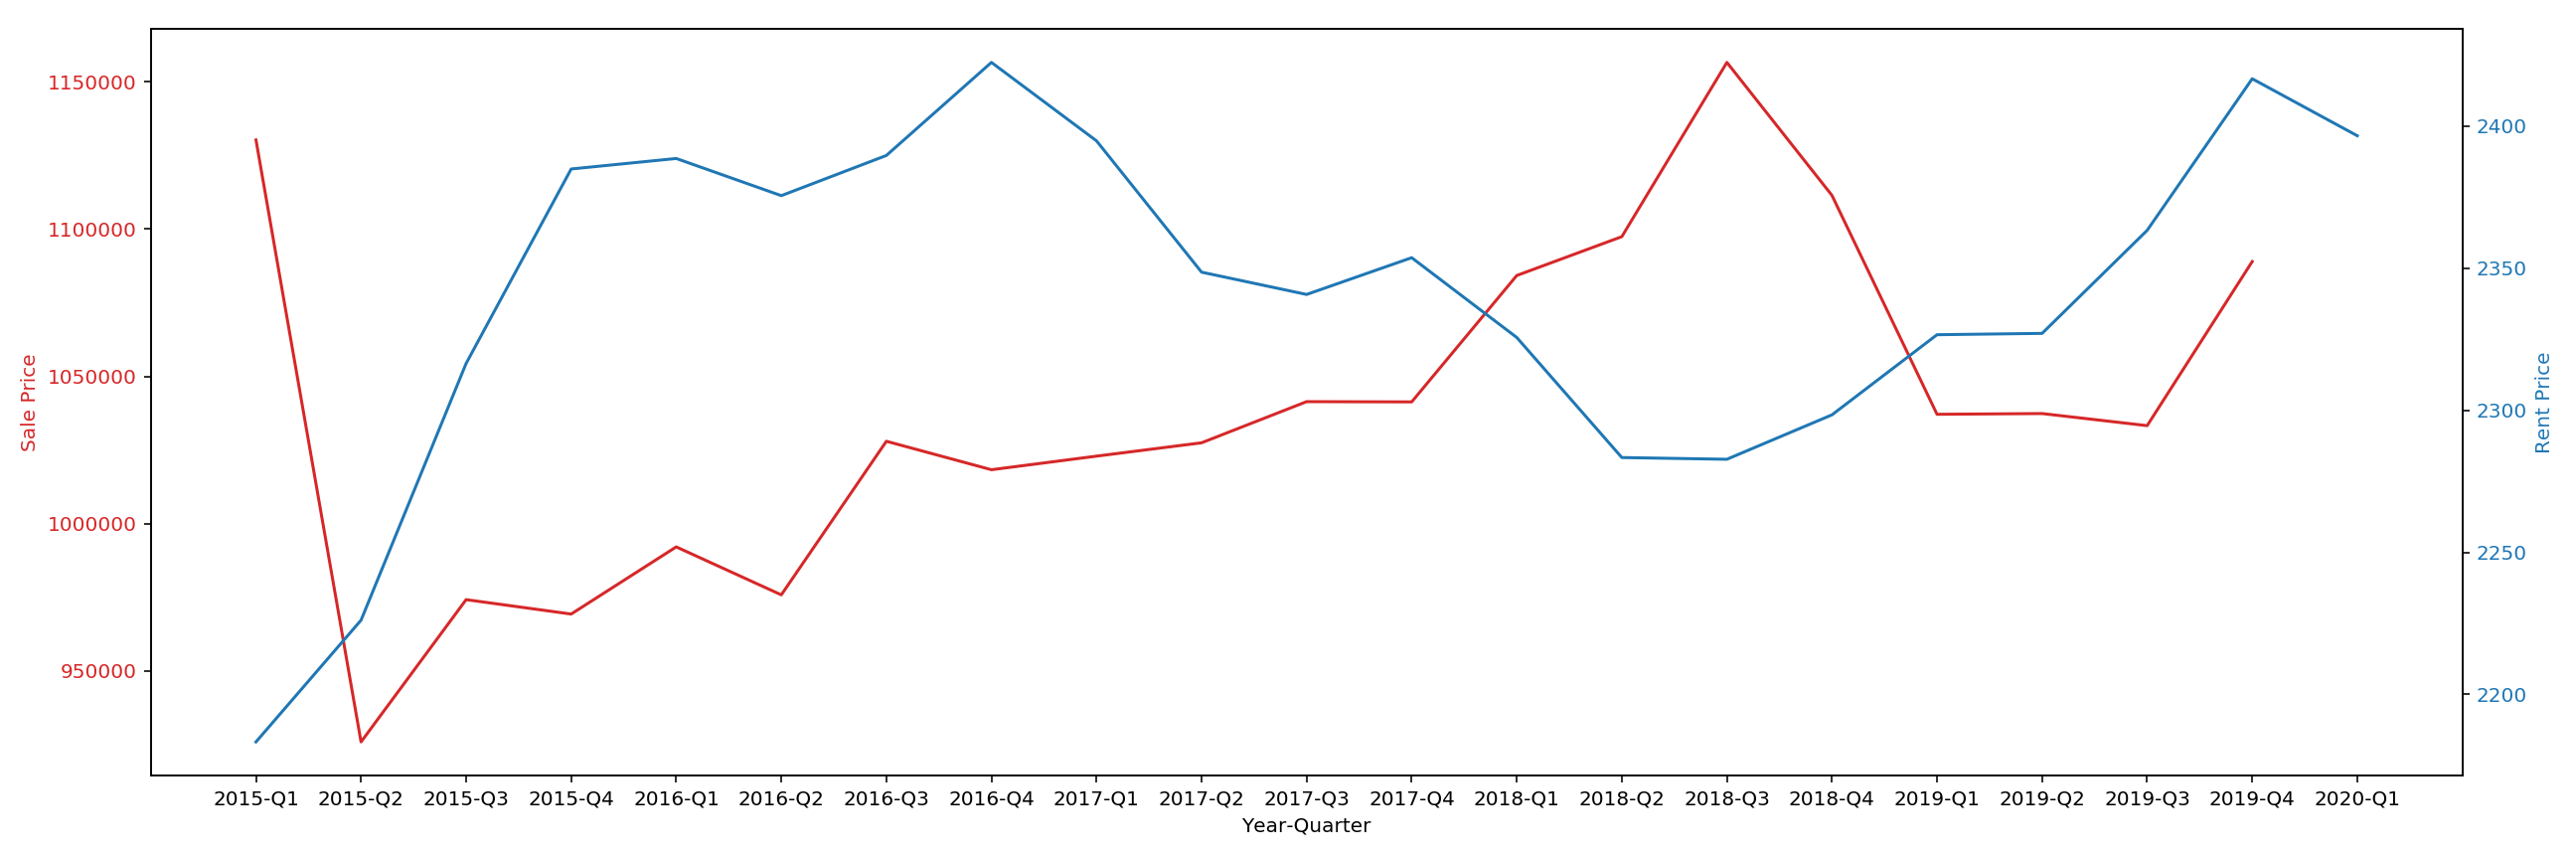
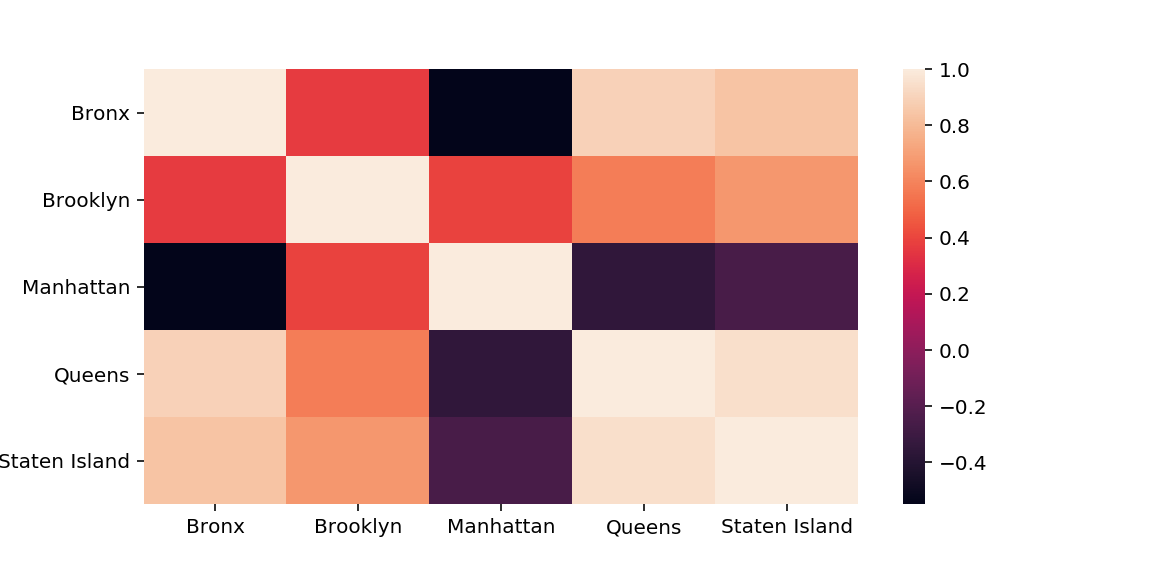
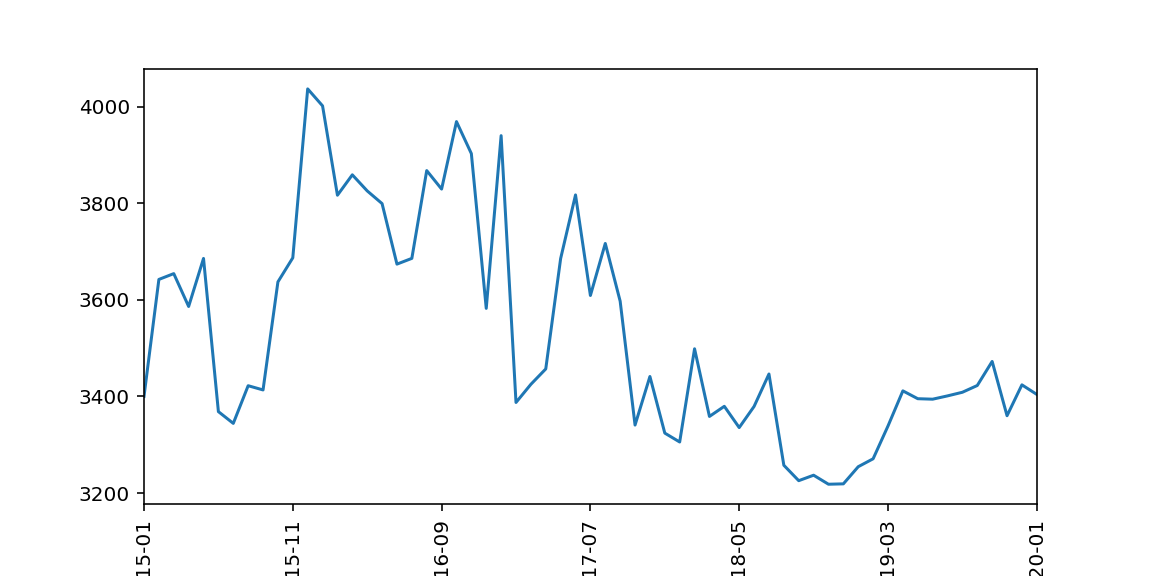
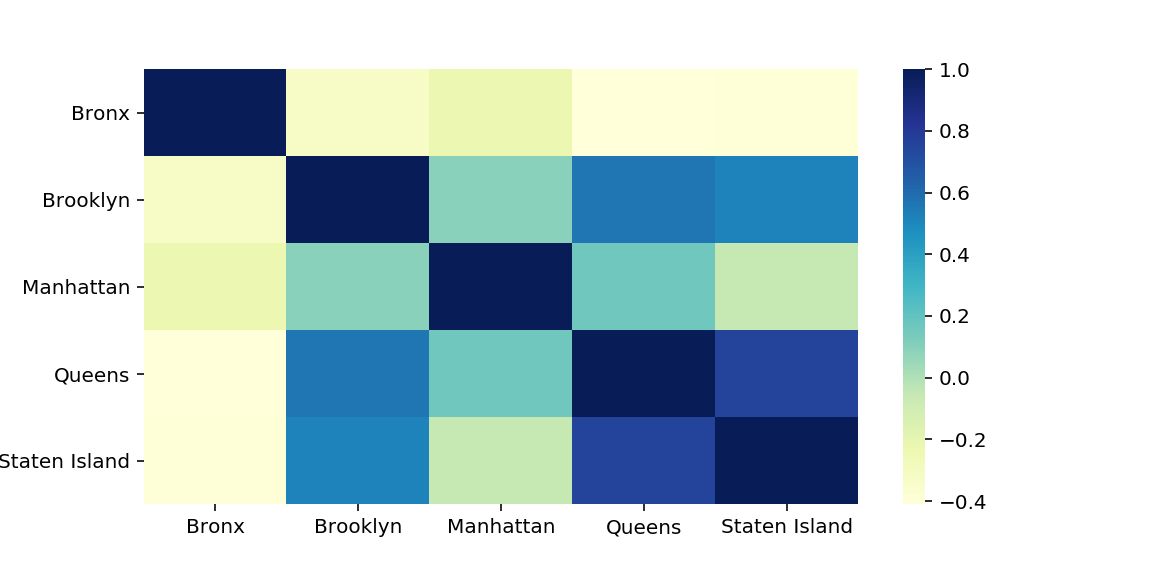
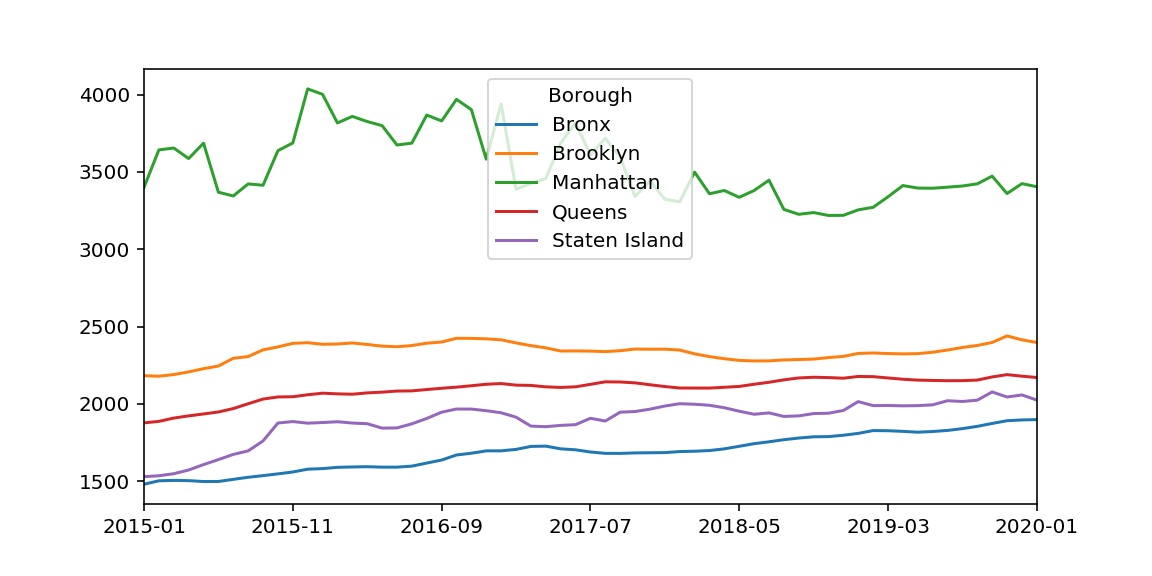
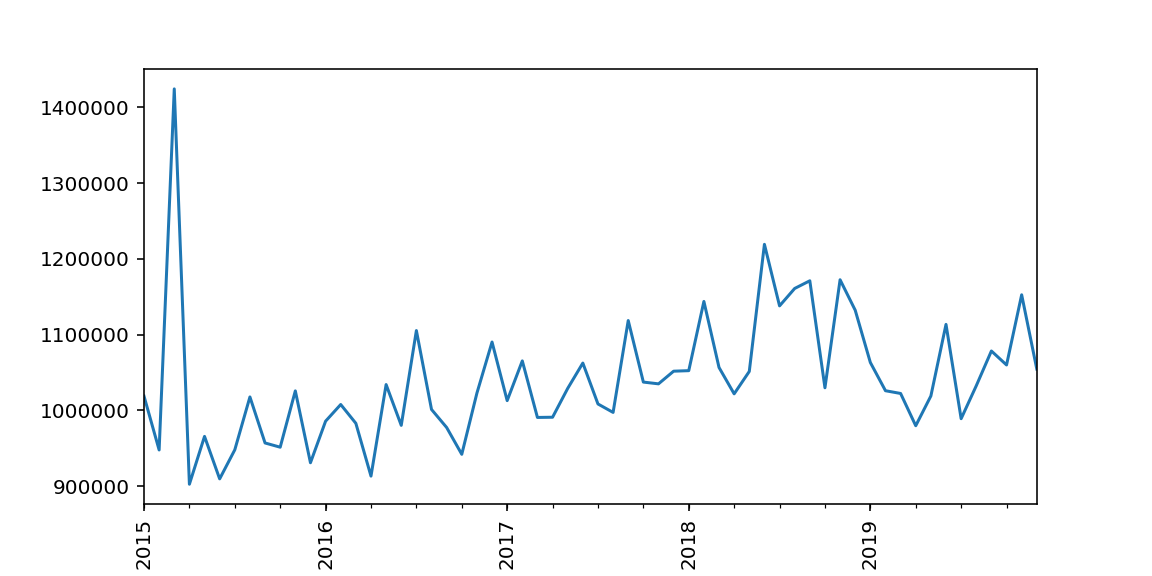
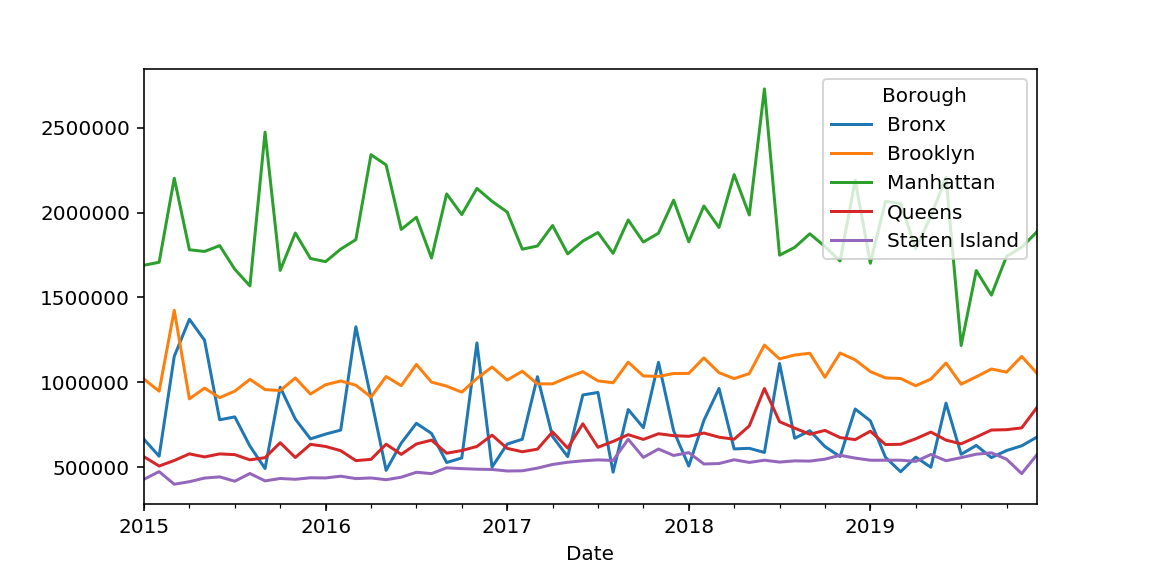

In [83]:
    
nyc_real_estate=pn.Tabs(("Avg sale & rent prices",column_1),
                        ("Interactive avg prices",column_2),
                        ("Heat Maps", column_3),
                        ("Correlation",column_4),
                        ("2019 Sales ",column_5),
                        ("2019 Snapshot",column_6),
                        ("2018/2019 Changes",column_7),
                        ("2019 Sales&ROI map",column_8))
nyc_real_estate




Tabs(active=7)
    [0] Column
        [0] Markdown(str)
        [1] Column
            [0] Column()
            [1] Row
                [0] Matplotlib(Figure, name='interactive06753')
        [2] Markdown(str)
        [3] Column
            [0] Column()
            [1] Row
                [0] Matplotlib(Figure, name='interactive06761')
    [1] Column
        [0] Markdown(str)
        [1] Column
            [0] Column
                [0] Select(name='borough', options=['Manhattan', ...], value='Staten Island')
            [1] Row
                [0] Matplotlib(Figure, name='interactive06768')
        [2] Markdown(str)
        [3] Column
            [0] Column
                [0] Select(name='borough', options=['Manhattan', ...], value='Manhattan')
            [1] Row
                [0] Matplotlib(Figure, name='interactive06775')
    [2] Column
        [0] Markdown(str)
        [1] Column
            [0] Column()
            [1] Row
                [0] Matplotlib(Figure, name='interactive06789')
        [2] Markdown(str)
        [3] Column
            [0] Column()
            [1] Row
                [0] Matplotlib(Figure, name='interactive06797')
    [3] Column
        [0] Markdown(str)
        [1] Column
            [0] Column
                [0] Select(name='borough', options=['Manhattan', ...], value='Manhattan')
            [1] Row
                [0] Matplotlib(Figure, name='interactive06804')
    [4] Column
        [0] HoloViews(Bars)
    [5] Column
        [0] Markdown(str)
        [1] Column
            [0] Column()
            [1] Row
                [0] Plotly(Figure, hover_data={'points': [{'curveNumber'...}, name='interactive06925', viewport={'xaxis.range': [-0.5, ...})
    [6] Column
        [0] Markdown(str)
        [1] Column
            [0] Column()
            [1] Row
                [0] Plotly(Figure, name='interactive06934', viewport={'xaxis.range': [-0.5, ...})
    [7] Column
        [0] Markdown(str)
        [1] Column
            [0] Column()
            [1] Row
                [0] Plotly(Figure, name='interactive06943', relayout_data={'mapbox.center': {'lon': ...})
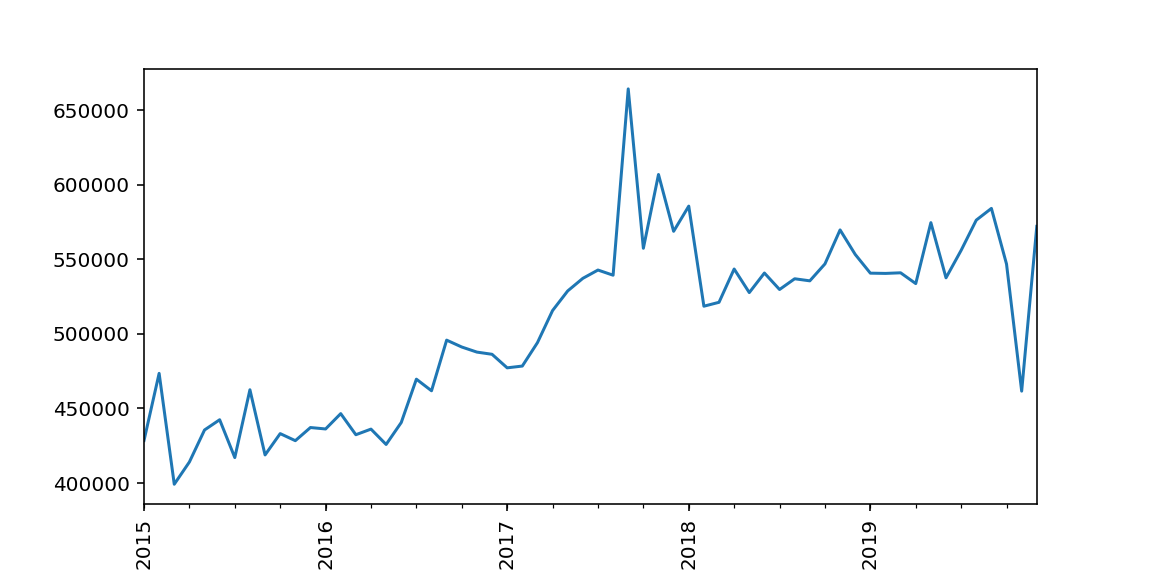
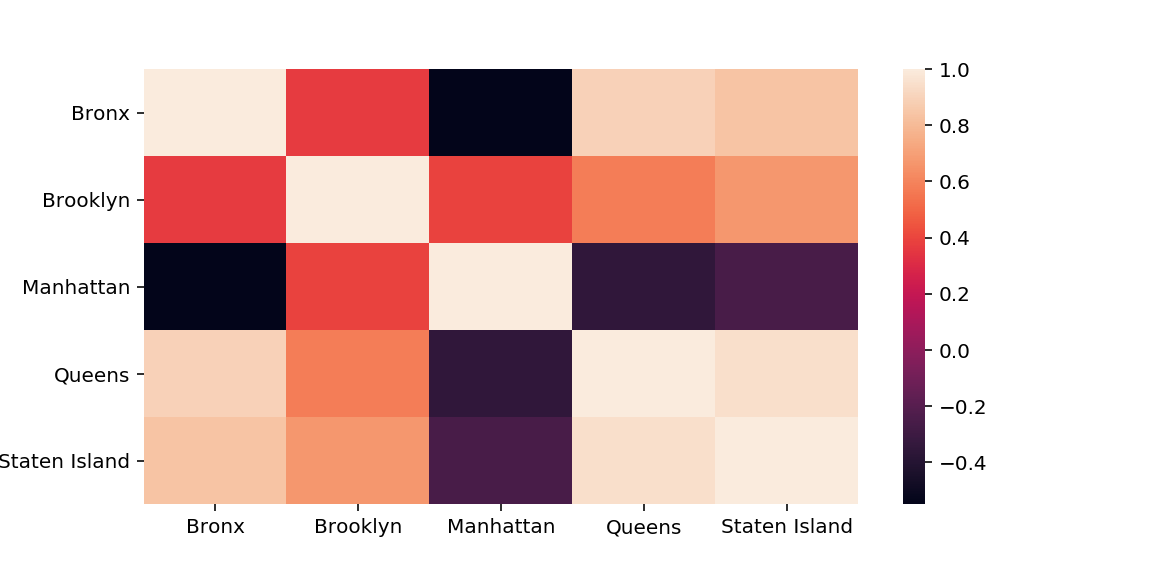
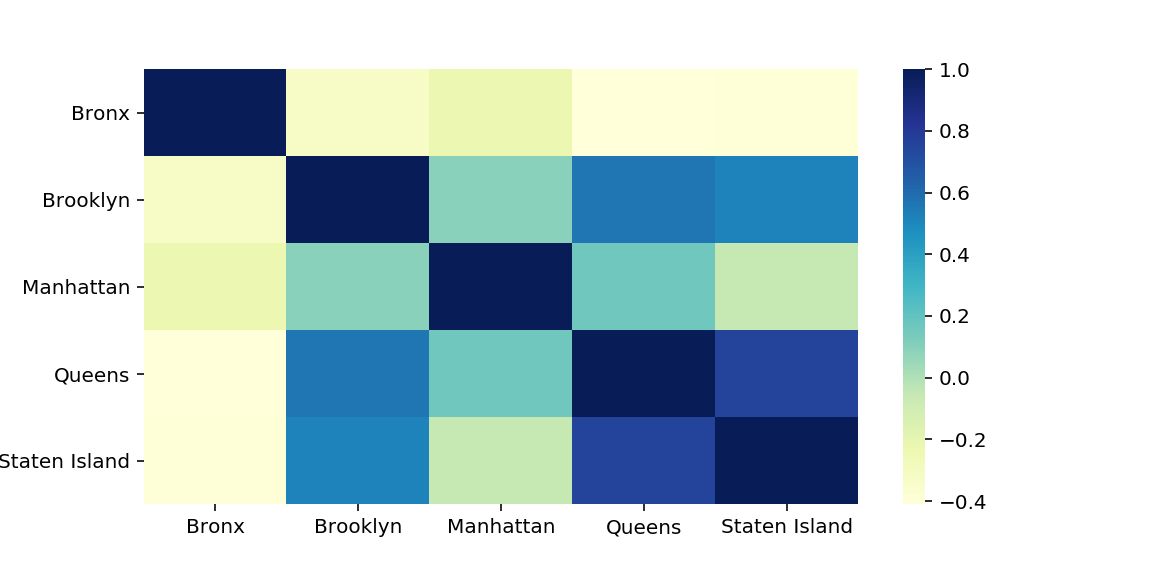
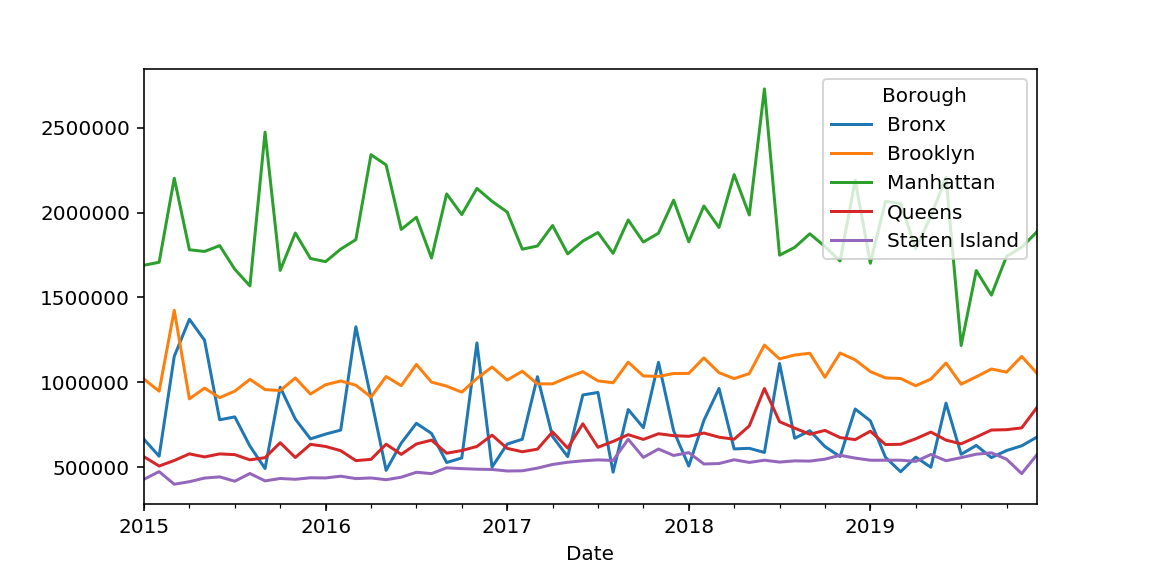
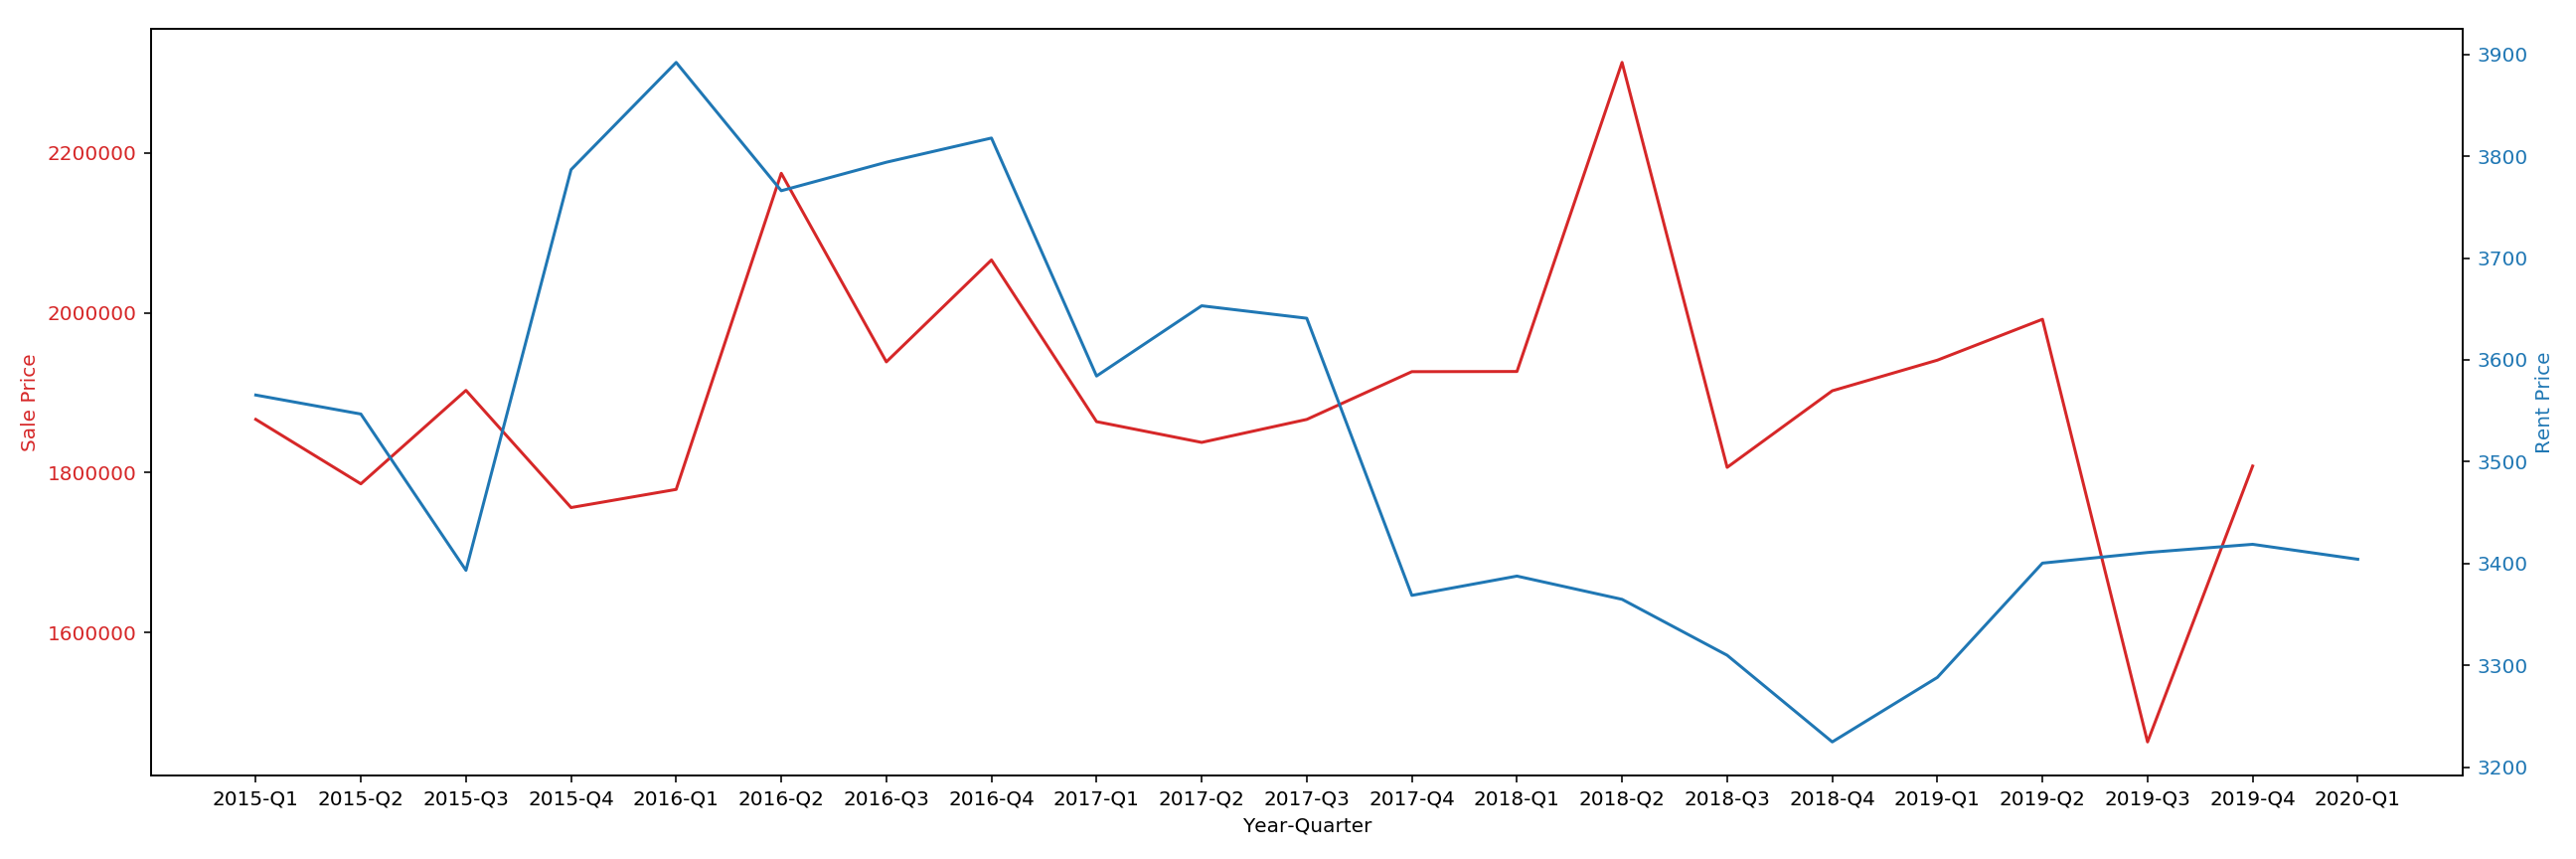
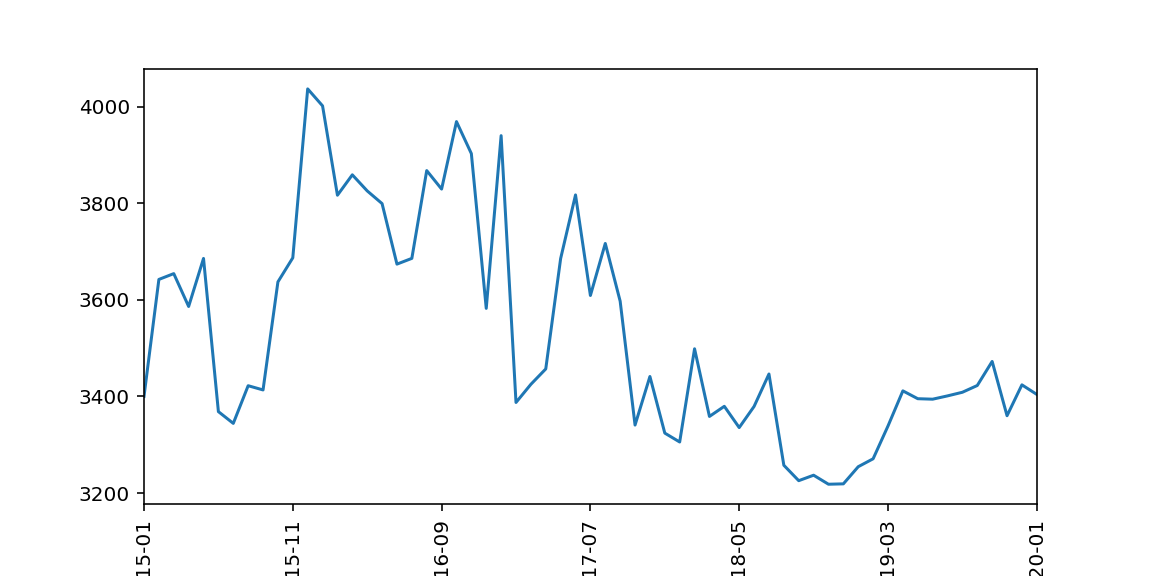
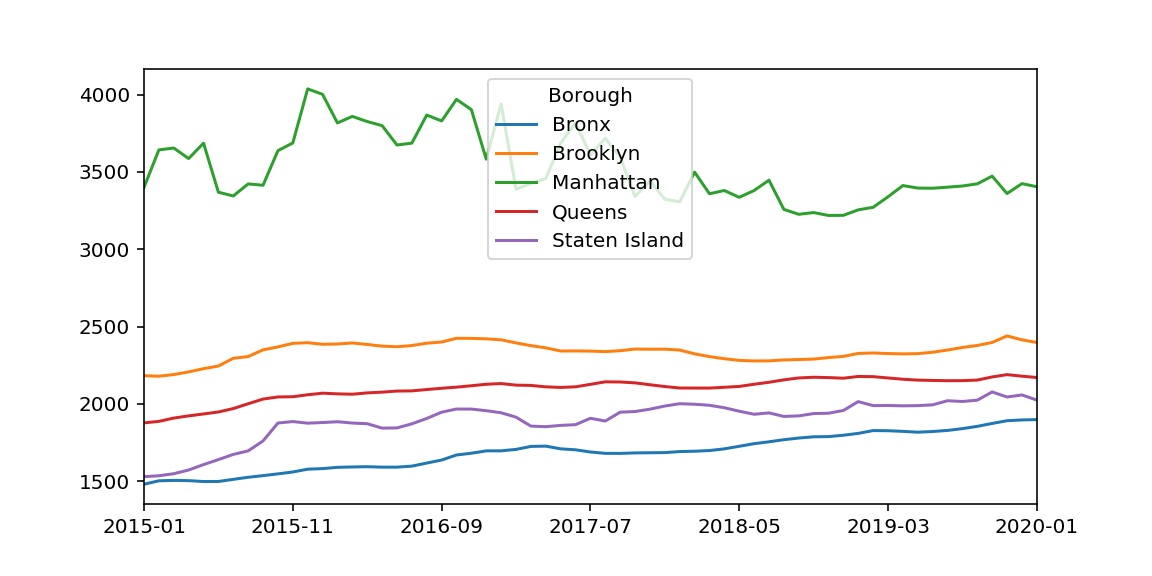

In [84]:
nyc_real_estate.servable()

In [85]:
pn.pane.HTML.save(nyc_real_estate, "index", title=None, resources=None, template=None,
        embed=True, max_states=1000,json_prefix='', save_path='./',
        load_path=None)